In [4]:
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

features = np.loadtxt(open("../final_data.csv", "rb"), delimiter=",", skiprows=1, usecols=range(1,94) )
features = features.transpose()
features = stats.zscore(features)
y = np.loadtxt(open("../all_data.csv", "rb"), delimiter=",", skiprows=1, usecols=range(1,94))
y = y[0,:]

In [5]:
lr_accuracies = []
lr_scores = []
svm_accuracies = []
svm_scores = []
strat_labels = []

rbf = svm.SVC(kernel='linear')
logistic = linear_model.LogisticRegression(C=1e5)

skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(features, y):
    train_data, test_data = features[train_index], features[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    log = logistic.fit(train_data, train_labels)
    log_prob = log.decision_function(test_data)
    log_acc = log.score(test_data, test_labels)
    #print('Logistic Regression Accuracy: %f' % log_acc)
    
    rbf = rbf.fit(train_data, train_labels)
    svm_acc = rbf.score(test_data, test_labels)
    svm_prob = rbf.decision_function(test_data)
    #print('SVM Accuracy: %f' % svm_acc)
    
    lr_accuracies = np.append(lr_accuracies, log_acc)
    lr_scores = np.append(lr_scores, log_prob)
    svm_accuracies = np.append(svm_accuracies, svm_acc)
    svm_scores = np.append(svm_scores, svm_prob)
    strat_labels = np.append(strat_labels, test_labels)
print("LR accuracy avg: {}".format(np.mean(lr_accuracies)))
print("SVM accuracy avg: {}".format(np.mean(svm_accuracies)))

LR accuracy avg: 0.9677777777777778
SVM accuracy avg: 0.9366666666666668


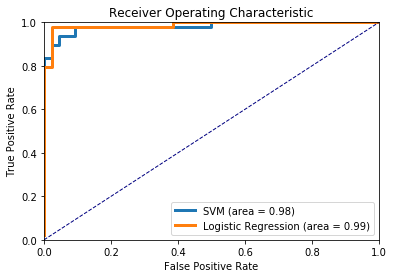

In [6]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr['svm'], tpr['svm'], _ = roc_curve(strat_labels, svm_scores)
roc_auc['svm'] = auc(fpr['svm'], tpr['svm'])
fpr['lr'], tpr['lr'], _ = roc_curve(strat_labels, lr_scores)
roc_auc['lr'] = auc(fpr['lr'], tpr['lr'])

plt.figure()
plt.plot(fpr['svm'], tpr['svm'], lw=3, label='SVM (area = %0.2f)' % roc_auc['svm'])
plt.plot(fpr['lr'], tpr['lr'], lw=3, label='Logistic Regression (area = %0.2f)' % roc_auc['lr'])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('param_ROC.eps')
plt.show()